In [44]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Conv2D, MaxPooling2D, Input, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [36]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [37]:
x_train[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [38]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [39]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [40]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [41]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [56]:
def create_cnn_model():
    # Define the input layer
    input_layer = Input(shape=(28, 28, 1))
    
    # First Conv2D layer
    x = Conv2D(32, (3, 3), activation='relu')(input_layer)
    x = MaxPooling2D(pool_size=(3, 3), strides=(1, 1))(x)
    
    # Second Conv2D layer
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(1, 1))(x)
    
    # Flatten the feature maps
    x = Flatten()(x)
    
    # Fully connected Dense layer
    x = Dense(64, activation='relu')(x)
    
    # Output Dense layer with 10 units (for 10 classes) and softmax activation
    output_layer = Dense(10, activation='softmax')(x)
    
    # Create the model
    model = Model(inputs=input_layer, outputs=output_layer, name="Custom_CNN_Model")
    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [57]:
# Create and summarize the model
model = create_cnn_model()
model.summary()

# (filter height * width * input channel + 1) * number of filter
# for dense: input size * num of units + num of units

Model: "Custom_CNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │     1,638,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,657,930 (6.32 MB)

 Trainable params: 1,657,930 (6.32 MB)

 Non-trainable params: 0 (0.00 B)

In [68]:
x_train_original, x_val_original, y_train_original, y_val_original = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [63]:
history_original = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 0.9953 - loss: 0.0186 - val_accuracy: 0.9967 - val_loss: 0.0135
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 0.9986 - loss: 0.0054 - val_accuracy: 0.9958 - val_loss: 0.0173
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 24ms/step - accuracy: 0.9978 - loss: 0.0066 - val_accuracy: 0.9964 - val_loss: 0.0166
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9986 - loss: 0.0038 - val_accuracy: 0.9937 - val_loss: 0.0274
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.9970 - loss: 0.0089 - val_accuracy: 0.9959 - val_loss: 0.0196
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - accuracy: 0.9982 - loss: 0.0053 - val_accuracy: 0.9949 - val_loss: 0.0223
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.9987 - loss: 0.0043 - val_accuracy: 0.9943 - val_loss: 0.0303
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.9987 -

In [64]:
augmented_model = create_cnn_model()
augmented_model.summary()

Model: "Custom_CNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │     1,638,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,657,930 (6.32 MB)

 Trainable params: 1,657,930 (6.32 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1
)

In [69]:
datagen.fit(x_train_original)

In [70]:
val_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1
)

In [71]:
val_datagen.fit(x_val_original)

In [72]:
history_augmented = augmented_model.fit(
    datagen.flow(x_train_original, y_train_original, batch_size=32), 
    validation_data=val_datagen.flow(x_val_original, y_val_original, batch_size=32),
    epochs=10
)

Epoch 1/10


/Users/fahimahammedfiroz/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.8242 - loss: 0.5350 - val_accuracy: 0.9432 - val_loss: 0.1838
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9656 - loss: 0.1134 - val_accuracy: 0.9743 - val_loss: 0.0845
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.9734 - loss: 0.0877 - val_accuracy: 0.9769 - val_loss: 0.0787
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 26ms/step - accuracy: 0.9786 - loss: 0.0707 - val_accuracy: 0.9827 - val_loss: 0.0563
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.9802 - loss: 0.0623 - val_accuracy: 0.9818 - val_loss: 0.0573
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - accuracy: 0.9829 - loss: 0.0551 - val_accuracy: 0.9837 - val_loss: 0.0544
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - accuracy: 0.9848 - loss: 0.0503 - val_accuracy: 0.9858 - val_loss: 0.0518
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - accuracy: 0.9857 - loss: 0.04

In [73]:
test_loss_original, test_acc_original = model.evaluate(x_test, y_test)
test_loss_augmented, test_acc_augmented = augmented_model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9897 - loss: 0.0776
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9833 - loss: 0.0498


In [74]:
print(f"Test accuracy of original model: {test_acc_original:.4f}")
print(f"Test accuracy of augmented model: {test_acc_augmented:.4f}")

Test accuracy of original model: 0.9913
Test accuracy of augmented model: 0.9868


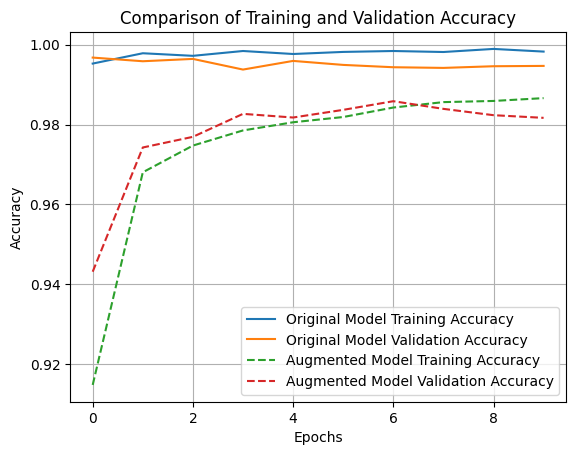

In [77]:
plt.plot(history_original.history['accuracy'], label='Original Model Training Accuracy')
plt.plot(history_original.history['val_accuracy'], label='Original Model Validation Accuracy')
plt.plot(history_augmented.history['accuracy'], linestyle="--", label='Augmented Model Training Accuracy')
plt.plot(history_augmented.history['val_accuracy'], linestyle="--", label='Augmented Model Validation Accuracy')
plt.title('Comparison of Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()